## Шаг 4: Разбиваем текст на чанки

### Цель:
Создать функции для **чанкования** текстовых данных, таких как FAQ и информация о курсах, с добавлением метаданных. Разбивка на чанки — это процесс разделения длинных текстов на логические части, что облегчает дальнейшую обработку, векторизацию и индексацию в базах данных, таких как Qdrant.

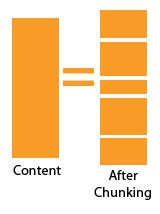
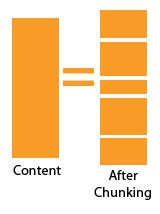

## Теория:

1. **Что такое чанки?**
   Чанк — это логическая часть текста, которая содержит отдельный фрагмент информации. Например, в контексте FAQ это может быть один вопрос и его ответ. Для информации о курсе это может быть одно описание или одна категория. Чанкование позволяет работать с текстом частями, что важно для эффективной векторизации и поиска по данным.

2. **Зачем это нужно для построения RAG-модели?**
   В рамках RAG-модели (retrieval-augmented generation) данные делятся на чанки для эффективного извлечения и обработки информации. Когда требуется извлечь релевантную информацию для ответа на запрос, важно иметь возможность быстро найти нужные чанки текста. Индексация данных в векторной базе (например, Qdrant) также требует работы с чанками для обеспечения быстрых поисковых операций.

3. **Индексация в векторной Qdrant:**
   После того как текст будет разделен на чанки, каждый чанк можно векторизовать (преобразовать в числовое представление). Эти векторы затем будут добавлены в векторную базу данных (например, Qdrant), где они будут индексированы и подготовлены для быстрого поиска схожих текстов.

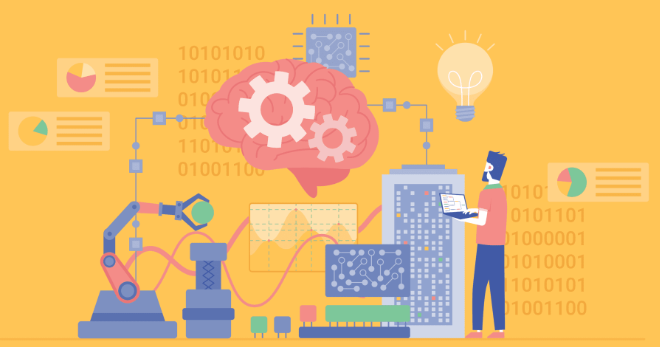

### Задание 1: **Функция для чанкования FAQ**
Напишите функцию, которая будет принимать коллекцию FAQ (вопросов и ответов) и информацию о курсах, а затем разбивать каждый вопрос и ответ на отдельные чанки. Каждый чанк должен содержать следующую информацию:
- `chunk_id`: уникальный идентификатор чанка.
- `course_name`: название курса.
- `course_url`: URL курса.
- `question_and_answer`: вопрос-ответ.
- Дополнительные метаданные, такие как тип чанка и индекс.

**Подсказка**:
- Для каждого курса и его FAQ создайте чанки, добавьте к ним метаданные и создайте уникальный идентификатор для каждого чанка.

### Задание 2: **Функция для чанкования основной информации о курсе**
Напишите функцию, которая будет принимать коллекцию основной информации о курсе и информацию о курсах, затем разбивать информацию на отдельные чанки, добавляя метаданные для каждого элемента (например, описание, категории и т.д.). Каждый чанк должен содержать:
- `chunk_id`: уникальный идентификатор чанка.
- `course_name`: название курса.
- `course_url`: URL курса.
- `sequence`: сам текст.
- Дополнительные метаданные, такие как тип чанка и индекс.

**Подсказка**:
- Для каждого курса и его информации создайте чанки с соответствующими метаданными.

---

### Ожидаемые функции:

1. **`prepare_faq_chunks()`**:
   Функция должна разделять вопросы и ответы на отдельные чанки и добавлять метаданные.

2. **`prepare_info_chunks()`**:
   Функция должна разделять основную информацию о курсах на чанки с добавлением метаданных.

### Требования:
1. Функции должны принимать коллекции FAQ и информации о курсах.
2. Каждая функция должна возвращать список чанков, каждый из которых представляет собой словарь с текстом и метаданными.
3. Обратите внимание на добавление уникальных идентификаторов для каждого чанка, чтобы затем можно было использовать эти идентификаторы для индексации в Qdrant.

После выполнения этих шагов, вы сможете продолжить с векторизацией данных (с помощью модели **Sentence-BERT**), а затем загрузить их в векторную базу данных **Qdrant** для дальнейшего использования в системе поиска или рекомендаций.

---

### Что проверяется:
- Правильность работы функций `prepare_faq_chunks()` и `prepare_info_chunks()`.

### Как сдавать задание:

- Заранее определить импорты нужных библиотек (например, для парсинга)
- Загрузить скрипты со всеми функциями с таким же именами (можно посмотреть шаблон функции) и дождаться проверки

## Решение заданий

### Задание 1 - Функция для чанкования FAQ

#### Решение студента

In [ ]:
from typing import Dict, List


courses_df = pd.DataFrame({'course_name': courses_titles, 'course_url': info_collection_classified.keys()})

def prepare_faq_chunks(faq_collection: Dict[str, List[str]], courses_df: pd.DataFrame, start_id: int = 0) -> List[Dict]:
    """
    Подготавливает чанки для FAQ, извлекая вопросы и ответы с добавлением метаданных для каждого чанка.

    Эта функция принимает коллекцию FAQ для каждого курса и соответствующую информацию о курсах, а затем разбивает
    каждый вопрос и ответ на отдельные чанки с добавлением метаданных, таких как идентификатор курса и индекс вопроса.

    Параметры:
    - faq_collection (Dict[str, List[str]]): Коллекция FAQ, где ключ — это URL курса, а значение — список строк в формате "Вопрос: <text> Ответ: <text>".
    - courses_df (pd.DataFrame): DataFrame, содержащий названия курсов и их URL.
    - start_id (int): Начальный индекс для нумерации чанков. По умолчанию равен 0.

    Возвращаемое значение:
    - List[Dict]: Список чанков, где каждый чанк представляет собой словарь с информацией о вопросах и ответах.

    Пример:
    >>> faq_collection = {'https://example.com/course1': ['Вопрос: Что такое Python? Ответ: Это язык программирования.']}
    >>> courses_df = pd.DataFrame({'course_url': ['https://example.com/course1'], 'course_name': ['Python Course']})
    >>> prepare_faq_chunks(faq_collection, courses_df)
    [{'chunk_id': 'course1_0', 'course_name': 'Python Course', 'course_url': 'https://example.com/course1', 'content': 'Вопрос: Что такое Python? Ответ: Это язык программирования.', 'question': 'Что такое Python?', 'answer': 'Это язык программирования.', 'metadata': {'chunk_type': 'qa', 'course_id': 'course1', 'qa_index': 0, 'total_qa_pairs': 1}}]
    """
    
    chunks = []
    
    course_names = ...
    
    for course_url, qa_pairs in faq_collection.items():
        course_name = ...
        
        for i, qa_pair in enumerate(qa_pairs, start=start_id):   
            chunk = {
                'chunk_id': f"{course_url.split('/')[-1]}_{i}",
                'course_name': course_name,
                'course_url': course_url,
                'question_and_answer': ...,
                'metadata': {
                    'chunk_type': 'qa',
                    'course_id': course_url.split('/')[-1],
                    'qa_index': i,
                    'total_qa_pairs': len(qa_pairs)
                }
            }
            chunks.append(chunk)
    
    return chunks

#### Эталонное решение

In [ ]:
from typing import Dict, List


courses_df = pd.DataFrame({'course_name': courses_titles, 'course_url': info_collection_classified.keys()})

def prepare_faq_chunks(faq_collection: Dict[str, List[str]], courses_df: pd.DataFrame, start_id: int = 0) -> List[Dict]:
    """
    Подготавливает чанки для FAQ, извлекая вопросы и ответы с добавлением метаданных для каждого чанка.

    Эта функция принимает коллекцию FAQ для каждого курса и соответствующую информацию о курсах, а затем разбивает
    каждый вопрос и ответ на отдельные чанки с добавлением метаданных, таких как идентификатор курса и индекс вопроса.

    Параметры:
    - faq_collection (Dict[str, List[str]]): Коллекция FAQ, где ключ — это URL курса, а значение — список строк в формате "Вопрос: <text> Ответ: <text>".
    - courses_df (pd.DataFrame): DataFrame, содержащий названия курсов и их URL.
    - start_id (int): Начальный индекс для нумерации чанков. По умолчанию равен 0.

    Возвращаемое значение:
    - List[Dict]: Список чанков, где каждый чанк представляет собой словарь с информацией о вопросах и ответах.
    """
    
    chunks = []
    
    course_names = dict(zip(courses_df['course_url'], courses_df['course_name']))
    
    for course_url, qa_pairs in faq_collection.items():
        course_name = course_names[course_url]
        
        for i, qa_pair in enumerate(qa_pairs, start=start_id):       
            chunk = {
                'chunk_id': f"{course_url.split('/')[-1]}_{i}",
                'course_name': course_name,
                'course_url': course_url,
                'question_and_answer': qa_pair,
                'metadata': {
                    'chunk_type': 'qa',
                    'course_id': course_url.split('/')[-1],
                    'qa_index': i,
                    'total_qa_pairs': len(qa_pairs)
                }
            }
            chunks.append(chunk)
    
    return chunks

### Задание 2 - Функция для чанкования основной информации о курсе

#### Решение студента

In [ ]:
def prepare_info_chunks(info_collection: Dict[str, List[Dict]], courses_df: pd.DataFrame, start_id: int = 0) -> List[Dict]:
    """
    Подготавливает чанки для основной информации о курсе, включая описание и категории.

    Эта функция принимает коллекцию информации о курсе и соответствующую информацию о курсах, затем разбивает
    данные на отдельные чанки, добавляя метаданные для каждого элемента, такие как идентификатор курса и индекс.

    Параметры:
    - info_collection (Dict[str, List[Dict]]): Коллекция информации о курсах, где ключ — это URL курса, а значение — список словарей с информацией (например, описание, категории).
    - courses_df (pd.DataFrame): DataFrame, содержащий названия курсов и их URL.
    - start_id (int): Начальный индекс для нумерации чанков. По умолчанию равен 0.

    Возвращаемое значение:
    - List[Dict]: Список чанков, где каждый чанк содержит информацию о курсе, включая описание и категории.
    
    Пример:
    >>> courses_information = {'https://example.com/course1': [{'sequence': 'Описание курса 1', 'categories': ['категория 1']}]} 
    >>> courses_df = pd.DataFrame({'course_url': ['https://example.com/course1'], 'course_name': ['Python Course']})
    >>> prepare_information_chunks(courses_information, courses_df)
    [{'chunk_id': 'course1_0', 'course_name': 'Python Course', 'course_url': 'https://example.com/course1', 'sequence': 'Описание курса 1', 'categories': ['категория 1'], 'metadata': {'chunk_type': 'course_information', 'course_id': 'course1', 'course_information_index': 0, 'total_sequences': 1}}]
    """
    chunks = []
    
    course_names = ...

    for course_url, values in info_collection.items():
        course_name = ...

        for i, elem in enumerate(values, start=start_id):
            chunk = {
                'chunk_id': f"{course_url.split('/')[-1]}_{i}",
                'course_name': course_name,
                'course_url': course_url,
                'sequence': ...,
                'categories': ...,
                'metadata': {
                    'chunk_type': 'course_information',
                    'course_id': course_url.split('/')[-1],
                    'course_information_index': i,
                    'total_sequences': len(values)
                }
            }
            chunks.append(chunk)
    
    return chunks

#### Эталонное решение

In [ ]:
def prepare_info_chunks(info_collection: Dict[str, List[Dict]], courses_df: pd.DataFrame, start_id: int = 0) -> List[Dict]:
    """
    Подготавливает чанки для основной информации о курсе, включая описание и категории.

    Эта функция принимает коллекцию информации о курсе и соответствующую информацию о курсах, затем разбивает
    данные на отдельные чанки, добавляя метаданные для каждого элемента, такие как идентификатор курса и индекс.

    Параметры:
    - info_collection (Dict[str, List[Dict]]): Коллекция информации о курсах, где ключ — это URL курса, а значение — список словарей с информацией (например, описание, категории).
    - courses_df (pd.DataFrame): DataFrame, содержащий названия курсов и их URL.
    - start_id (int): Начальный индекс для нумерации чанков. По умолчанию равен 0.

    Возвращаемое значение:
    - List[Dict]: Список чанков, где каждый чанк содержит информацию о курсе, включая описание и категории.
    """
    chunks = []
    
    course_names = dict(zip(courses_df['course_url'], courses_df['course_name']))

    for course_url, values in courses_information.items():
        course_name = course_names[course_url]

        for i, elem in enumerate(values, start=start_id):
            chunk = {
                'chunk_id': f"{course_url.split('/')[-1]}_{i}",
                'course_name': course_name,
                'course_url': course_url,
                'sequence': elem['sequence'],
                'categories': elem['categories'],
                'metadata': {
                    'chunk_type': 'course_information',
                    'course_id': course_url.split('/')[-1],
                    'course_information_index': i,
                    'total_sequences': len(values)
                }
            }
            chunks.append(chunk)
    
    return chunks